In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

Just to check the contents

In [2]:
#Reading the dataset
data = pd.read_csv('ratings_Electronics.csv')
data.columns = ['userID','productID','ratings','timestamp']

In [3]:
data.head()

,userID,productID,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
#Droping timestamp as we don't want this
data.drop(columns=['timestamp'],inplace=True)

In [5]:
data.head()

,userID,productID,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [6]:
data.shape

(7824481, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userID       object
productID    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
#checking for any NaN values
data.isnull().sum()

userID       0
productID    0
ratings      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231BD132128>]],
      dtype=object)

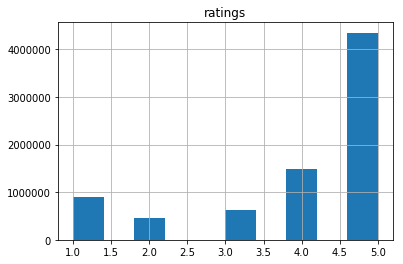

In [9]:
#Plotting the histogram to check the ratings
data.hist()

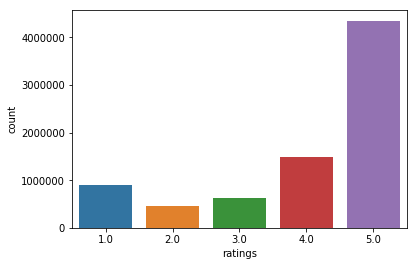

In [10]:
sns.countplot(data.ratings)

In [11]:
#Number of Unique users
len(data.userID.unique())

4201696

In [12]:
#Number of Unique product items
len(data.productID.unique())

476001

In [13]:
#Number of Unique ratings
data.ratings.unique()

array([5., 1., 3., 2., 4.])

In [14]:
#So ratings ranges from 1 to 5

In [15]:
data.ratings.describe()

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [16]:
#For better recommendations and to make the data less sparse/dense,we can take the users who had given 50 or more ratings
counts = data['userID'].value_counts()
data_sub = data[data['userID'].isin(counts[counts>=50].index)]

In [17]:
data_sub.head()

,userID,productID,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [18]:
data_sub.shape

(125871, 3)

In [19]:
final_ratings_matrix = data_sub.pivot(index = 'userID', columns ='productID', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [20]:
final_ratings_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Splitting the data into train and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_data, test_data = train_test_split(data_sub, test_size = 0.30, random_state=1)

In [24]:
train_data.shape

(88109, 3)

In [25]:
test_data.shape

(37762, 3)

In [26]:
train_data.head()

,userID,productID,ratings
4045823,AW63IRQWH10GF,B004DUMUA6,3.0
5461879,A2D1ZQEFS1NBH2,B006QDYH9U,1.0
1929769,AZNUHQSHZHSUE,B001DFZ5J2,4.0
685543,A3VTOLNB5N6FVP,B0009U7XH4,5.0
3461618,A17Z0LVY96TO53,B003MVZ60I,4.0


In [27]:
#Popularity Recommendations based on higher ratings

In [28]:
train_data_group = train_data.groupby('productID')['ratings'].mean()


In [29]:
train_data_sort = pd.DataFrame(train_data_group.sort_values(ascending=False)).reset_index()
popular_recom = train_data_sort.head(10)
popular_recom

,productID,ratings
0,B00LKG1MC8,5.0
1,B002P5DNY8,5.0
2,B002P3KMVC,5.0
3,B002P3KMXA,5.0
4,B002P3KMXU,5.0
5,B002P3KNP2,5.0
6,B002P3KO4C,5.0
7,B002P3KY7E,5.0
8,B002P4LL6G,5.0
9,B002P4YXI4,5.0


In [30]:
def recommend(user_id):     
    user_recommendations = popular_recom
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [31]:
recommend(5)

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userID,productID,ratings
0,5,B00LKG1MC8,5.0
1,5,B002P5DNY8,5.0
2,5,B002P3KMVC,5.0
3,5,B002P3KMXA,5.0
4,5,B002P3KMXU,5.0
5,5,B002P3KNP2,5.0
6,5,B002P3KO4C,5.0
7,5,B002P3KY7E,5.0
8,5,B002P4LL6G,5.0
9,5,B002P4YXI4,5.0


In [32]:
recommend(7)

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userID,productID,ratings
0,7,B00LKG1MC8,5.0
1,7,B002P5DNY8,5.0
2,7,B002P3KMVC,5.0
3,7,B002P3KMXA,5.0
4,7,B002P3KMXU,5.0
5,7,B002P3KNP2,5.0
6,7,B002P3KO4C,5.0
7,7,B002P3KY7E,5.0
8,7,B002P4LL6G,5.0
9,7,B002P4YXI4,5.0


In [33]:
#From above results it is found that Popularity based recommendation systems just gives the recomendation based on higher ratings and doesn't consider how many people rated the items

In [34]:
#Checking the count on product ID to which many users had rated

In [35]:
users_rate = train_data.groupby('productID')['ratings'].count()
users_rate = users_rate.sort_values(ascending=False)
users_rate.head()

productID
B0088CJT4U    155
B003ES5ZUU    124
B000N99BBC    122
B007WTAJTO    112
B00829TIEK    100
Name: ratings, dtype: int64

In [36]:
#Above results shows that most users rated items are not listed in the popularity based model because the mean ratings count in popularity recommendation doesn't account for number of users.

In [37]:
#Popularity Receommendations based on number of users rated the product

In [38]:
train_data_user = train_data.groupby('productID').agg({'userID':'count'}).reset_index()
train_data_user.rename(columns = {'userID': 'score'},inplace=True)
train_data_user.head()

,productID,score
0,0594451647,1
1,0970407998,2
2,0972683275,2
3,1400501466,2
4,1400501520,1


In [39]:
train_data_user = train_data_user.sort_values(['score','productID'],ascending=[0,1])
train_data_user['Rank'] = train_data_user['score'].rank(ascending=0,method='first')
popular_recom = train_data_user.head()
popular_recom

,productID,score,Rank
30797,B0088CJT4U,155,1.0
19529,B003ES5ZUU,124,2.0
8601,B000N99BBC,122,3.0
30194,B007WTAJTO,112,4.0
30489,B00829TIEK,100,5.0


In [40]:
def recommend(user_id):     
    user_recommendations = popular_recom
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [41]:
recommend(10)

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userID,productID,score,Rank
30797,10,B0088CJT4U,155,1.0
19529,10,B003ES5ZUU,124,2.0
8601,10,B000N99BBC,122,3.0
30194,10,B007WTAJTO,112,4.0
30489,10,B00829TIEK,100,5.0


In [42]:
recommend(20)

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,userID,productID,score,Rank
30797,20,B0088CJT4U,155,1.0
19529,20,B003ES5ZUU,124,2.0
8601,20,B000N99BBC,122,3.0
30194,20,B007WTAJTO,112,4.0
30489,20,B00829TIEK,100,5.0


In [43]:
#From above results we can see popularity based recommendations model recommends products which are most rated by users

In [44]:
#Collabrative Filtering using Surprise package

In [45]:
#User-User based filtering
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.reader import Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))

data_UU = Dataset.load_from_df(data_sub,reader)

trainset, testset = train_test_split(data_UU, test_size=.30)

UU_filter = KNNWithMeans(k=30, sim_options={'name': 'pearson_baseline', 'user_based': True})
UU_filter.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [46]:
test_pred = UU_filter.test(testset)
test_pred

[Prediction(uid='A2RIXSMGE9VIBG', iid='B0074FGLUM', r_ui=5.0, est=3.864864864864865, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AHF4I1FSIHABC', iid='B0015C30J0', r_ui=5.0, est=4.653061224489796, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3IUW081KXD3PE', iid='B00A3YDT5Q', r_ui=4.0, est=4.312629399585922, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1WUQF5HWBAQJU', iid='B0043VE28I', r_ui=2.0, est=4.405982905982906, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AIJQU979J6UFY', iid='B009GYIKHQ', r_ui=5.0, est=2.5453446982184937, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A2PK64OVZA1U8Z', iid='B00F3F0EIU', r_ui=3.0, est=4.246153846153846, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2I18AO597DSDI', iid='B00JXLGE70', r_ui=4.0, est=3.6122448979591835, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A10PEXB6XAQ5XF', iid='B001F0RPG

In [47]:
#RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0585


1.0584680352791018

In [48]:
#Collabrative Filtering using Surprise pacakage for SVD

In [49]:
from collections import defaultdict

from surprise import SVD

reader = Reader(rating_scale=(1, 5))

data_SVD = Dataset.load_from_df(data_sub,reader)

trainset = data_SVD.build_full_trainset()

In [50]:
algo = SVD()
algo.fit(trainset)

In [51]:
testset = trainset.build_anti_testset()
testset

[('A3BY5KCNQZXV5U', '0594481813', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '0970407998', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '0972683275', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400501466', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400501520', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400501776', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400532620', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400532655', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '140053271X', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400599997', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400698987', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1400699169', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '1685560148', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '3744295508', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '7562434166', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '787988002X', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '8862935307', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '8862936826', 4.26133898991825),
 ('A3BY5KCNQZXV5U', '9043413585', 4.2613389899

In [52]:
pred = algo.test(testset)
pred

[Prediction(uid='A3BY5KCNQZXV5U', iid='0594481813', r_ui=4.26133898991825, est=4.218220210222123, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='0970407998', r_ui=4.26133898991825, est=3.9635049170628704, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='0972683275', r_ui=4.26133898991825, est=4.26410900362503, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='1400501466', r_ui=4.26133898991825, est=3.894133300463657, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='1400501520', r_ui=4.26133898991825, est=4.223812926581256, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='1400501776', r_ui=4.26133898991825, est=4.4314561193303525, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='1400532620', r_ui=4.26133898991825, est=4.222867966710775, details={'was_impossible': False}),
 Prediction(uid='A3BY5KCNQZXV5U', iid='1400532655', r_ui=4.26

In [53]:
def get_top_n(pred, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [54]:
top_n = get_top_n(pred, n=10)
top_n

defaultdict(list,
            {'A3BY5KCNQZXV5U': [('B000M2TAN4', 5),
              ('B000NP3DJW', 5),
              ('B000OGX5AM', 4.934155359673463),
              ('B00017LSPI', 4.899052527235485),
              ('B001FA09WI', 4.8976976840753235),
              ('B002Y6CJJ8', 4.870705633458625),
              ('B0055CAR7Y', 4.861712634450445),
              ('B001M4HXB2', 4.8571367320865795),
              ('B002WE0QN8', 4.84592489072838),
              ('B00029U1DK', 4.845382704529303)],
             'AT09WGFUM934H': [('B00006I5J7', 5),
              ('B000F7QRTG', 5),
              ('B000M2TAN4', 5),
              ('B000VX6XL6', 5),
              ('B0010Y414Q', 5),
              ('B0010Z28XG', 5),
              ('B0019EHU8G', 5),
              ('B001QUA6RA', 5),
              ('B00BW6KCTU', 5),
              ('B00IVPU6AA', 5)],
             'A32HSNCNPRUMTR': [('B0019EHU8G', 4.802101653256002),
              ('B004ELA0SS', 4.725796178810656),
              ('B000VX6XL6', 4.716679585

In [55]:
# Printing the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3BY5KCNQZXV5U ['B000M2TAN4', 'B000NP3DJW', 'B000OGX5AM', 'B00017LSPI', 'B001FA09WI', 'B002Y6CJJ8', 'B0055CAR7Y', 'B001M4HXB2', 'B002WE0QN8', 'B00029U1DK']
AT09WGFUM934H ['B00006I5J7', 'B000F7QRTG', 'B000M2TAN4', 'B000VX6XL6', 'B0010Y414Q', 'B0010Z28XG', 'B0019EHU8G', 'B001QUA6RA', 'B00BW6KCTU', 'B00IVPU6AA']
A32HSNCNPRUMTR ['B0019EHU8G', 'B004ELA0SS', 'B000VX6XL6', 'B0051ZE4AQ', 'B0001GMIOE', 'B00GO4GMAI', 'B000I1X3W8', 'B00070QI1I', 'B000068O16', 'B00D6XW62I']
A17HMM1M7T9PJ1 ['B00BQ4F9ZA', 'B001TH7T2U', 'B0006I1TRY', 'B006U3O566', 'B00C20KWP4', 'B002WE0QN8', 'B001TH7GUU', 'B004ELA0SS', 'B00483WRZ6', 'B00CKAOJA0']
A3CLWR1UUZT6TG ['B00006HSML', 'B000089GN3', 'B0007QKMQY', 'B000I1X3W8', 'B000KZ67FC', 'B000UWYM5C', 'B0010Z28XG', 'B0013LQD7Y', 'B001AYGDCE', 'B001KB6Z2U']
A3TAS1AG6FMBQW ['B00000J4EY', 'B00001WRSJ', 'B00003006R', 'B00003CWAH', 'B00003GPVF', 'B00004S9AK', 'B00004SSRA', 'B00004T8R2', 'B00004TDMZ', 'B00004TX68']
A2Y4H3PXB07WQI ['B0000BZL5A', 'B000EPJL1A', 'B00IVPU6AA', 'B001UI

A3IOQ7NVVLAUEE ['B000067RT6', 'B00007M1TZ', 'B00008AWKZ', 'B00017LSPI', 'B0001CNMFM', 'B000N99BBC', 'B000V0IE5M', 'B000VDCTCI', 'B000WOIFO2', 'B0010Y414Q']
A1X1CEGHTHMBL1 ['B00000DM9W', 'B00000J1V1', 'B00001OPK2', 'B000022UHF', 'B00004RC2G', 'B00004RDL5', 'B00004TDRH', 'B00004U8LO', 'B00004UFQG', 'B00004XRDN']
A3V0YR50F1XSKP ['B00000DM9W', 'B00000J061', 'B00000J1V3', 'B00001RMDF', 'B00001W0DI', 'B000031KIM', 'B00004W3YK', 'B0000501U1', 'B000053HC5', 'B000053HH5']
A1CMD08Z49PGKQ ['9983891212', '9984922626', '9984984362', '9985511476', 'B000000O48', 'B00000DM9W', 'B00000J4M9', 'B00001W0DI', 'B0000228GG', 'B00002SWUE']
AN2IZT80ZUNJN ['B0000X0VCY', 'B000WXSO76', 'B005ES0YYA', 'B002WE0QN8', 'B001TH7T2U', 'B003N8GVUY', 'B00475K64E', 'B001QUA6RA', 'B007R9M6PO', 'B009YT6PPC']
A1CMWB7AWQUQH4 ['B004RORMF6', 'B001MSU1FS', 'B00HG1L334', 'B00BB72WX4', 'B00429N18S', 'B00BCA41PW', 'B00BW6KCTU', 'B0010Z28XG', 'B008EQZ25K', 'B00DXFDHV8']
A2Y3WWPUKIJ59I ['B0012Y6HC8', 'B000JV9LUK', 'B0012Y2LLE', 'B000M2

A3J6Q0Y0SKY7AR ['B00005LEN4', 'B0001GMIOE', 'B00029U1DK', 'B000M2TAN4', 'B0013FRNKG', 'B001P05NBA', 'B001UI2FPE', 'B002RCNX8K', 'B002WE4HE2', 'B0036Q7MV0']
AMWL7XIWIPXEZ ['B000FQ2JLW', 'B00387EW1K', 'B002JH3TW8', 'B00IVPU6AA', 'B009NB8WR0', 'B00D6XW62I', 'B002TMRZOQ', 'B0010Z28XG', 'B00029U1DK', 'B007PJ4P4G']
A1AZQCVCDBQP6 ['B00009EHJV', 'B0000X0VCY', 'B000M17AVO', 'B000M2TAN4', 'B000NP3DJW', 'B000Q85WRC', 'B001TH7GSW', 'B001TH7GUU', 'B001TH7T2U', 'B002NO7PWC']
A2A4X545ERLS7H ['B00009R89C', 'B000EPJL1A', 'B000JV9LUK', 'B001342KM8', 'B0015YJOK2', 'B0019EHU8G', 'B001QUA6R0', 'B004ELA0SS', 'B009NB8WR0', 'B009YQ8BTI']
AHS6PX6H22WW1 ['B003L1ZYZ6', 'B009NB8WR0', 'B0002LEMWE', 'B00008OE6I', 'B00BQ4F9ZA', 'B00EU9V3YO', 'B001UI2FPE', 'B000M2TAN4', 'B001QUA6RA', 'B00IVPU6AA']
AQIJ3ZEEVCIKU ['B0052SCU8U', 'B00IVFDZBC', 'B0099SMFP2', 'B00077AA5Q', 'B00D6XW62I', 'B000AY5Y5W', 'B0076MBOC8', 'B00029U1DK', 'B0002LEMWE', 'B006JINHYS']
A1ROUMJOGO4QMB ['B001FA09WI', 'B001RNOHDU', 'B001TH7GUU', 'B002V8C3W

In [56]:
#Collabrative Filtering Recommendation systems using SVD through scipy.sparse.linalg

In [58]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_sub, test_size = 0.30, random_state=1)

In [59]:
df_cf = pd.concat([train_data,test_data]).reset_index()
df_cf.head()

,index,userID,productID,ratings
0,4045823,AW63IRQWH10GF,B004DUMUA6,3.0
1,5461879,A2D1ZQEFS1NBH2,B006QDYH9U,1.0
2,1929769,AZNUHQSHZHSUE,B001DFZ5J2,4.0
3,685543,A3VTOLNB5N6FVP,B0009U7XH4,5.0
4,3461618,A17Z0LVY96TO53,B003MVZ60I,4.0


In [60]:
#User-based Collaborative Filtering
pivot_df = df_cf.pivot(index='userID',columns='productID',values='ratings').fillna(0)
pivot_df.shape
pivot_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
pivot_df['user_index'] = np.arange(0,pivot_df.shape[0],1)
pivot_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [62]:
pivot_df.set_index('user_index',inplace=True)
pivot_df.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#Importing SVD
from scipy.sparse.linalg import svds

In [64]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 25)

sigma = np.diag(sigma)

In [65]:
all_user_ratings = np.dot((np.dot(U,sigma)),Vt)

In [66]:
pred_rat = pd.DataFrame(all_user_ratings,columns=pivot_df.columns)
pred_rat.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003491,0.000684,0.004065,0.012175,0.006254,0.002613,0.010819,0.003804,0.019182,0.002257,...,0.000391,0.051843,0.006864,0.009935,-0.001937,0.006094,0.002739,0.005604,0.005102,0.013701
1,0.000248,-0.001703,-0.001718,0.072680,0.010269,-0.001441,0.037417,0.002969,0.010592,-0.001006,...,0.000074,0.051152,0.004013,-0.016662,-0.009998,0.000249,0.002750,-0.101594,-0.029952,0.024577
2,-0.001694,-0.001218,0.002630,-0.001364,0.006105,-0.001415,0.003607,0.003594,-0.008769,-0.001079,...,-0.000298,-0.009073,-0.000934,-0.018495,0.019188,-0.003534,0.000295,0.026855,-0.004495,-0.010328
3,0.002661,0.006917,-0.003865,0.009249,0.002022,0.001471,0.000879,-0.001290,0.005246,0.001178,...,0.000276,0.005796,0.002571,0.008302,-0.001461,0.000464,0.004805,0.015694,0.011472,-0.008722
4,0.000854,-0.002618,0.005930,0.022585,0.005621,0.001677,0.016133,0.003048,0.006297,0.001847,...,0.000360,0.005442,0.002516,-0.017275,0.001932,-0.002142,-0.001324,-0.045529,-0.012482,0.011259


In [67]:
# Recommend the products with the highest predicted ratings

def recommend_items(userID, pivot_df, pred_rat, num_recommendations):
      
    user_idx = userID-1 
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = pred_rat.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [68]:
userID = 50
num_recommendations = 5
recommend_items(userID, pivot_df, pred_rat, num_recommendations)

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]



Below are the recommended items for user(user_id = 50):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.969840
B004CLYEDC                  0.0          1.246555
B002R5AM7C                  0.0          1.223968
B00829TIEK                  0.0          1.049009
B004T9RR6I                  0.0          0.652404


In [69]:
#Evaluating performance of the model with actual and predicted ratings

In [70]:
# Actual ratings given by the users
final_ratings_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productID
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [72]:
#Predicted ratings
pred_rat.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.003491,0.000684,0.004065,0.012175,0.006254,0.002613,0.010819,0.003804,0.019182,0.002257,...,0.000391,0.051843,0.006864,0.009935,-0.001937,0.006094,0.002739,0.005604,0.005102,0.013701
1,0.000248,-0.001703,-0.001718,0.072680,0.010269,-0.001441,0.037417,0.002969,0.010592,-0.001006,...,0.000074,0.051152,0.004013,-0.016662,-0.009998,0.000249,0.002750,-0.101594,-0.029952,0.024577
2,-0.001694,-0.001218,0.002630,-0.001364,0.006105,-0.001415,0.003607,0.003594,-0.008769,-0.001079,...,-0.000298,-0.009073,-0.000934,-0.018495,0.019188,-0.003534,0.000295,0.026855,-0.004495,-0.010328
3,0.002661,0.006917,-0.003865,0.009249,0.002022,0.001471,0.000879,-0.001290,0.005246,0.001178,...,0.000276,0.005796,0.002571,0.008302,-0.001461,0.000464,0.004805,0.015694,0.011472,-0.008722
4,0.000854,-0.002618,0.005930,0.022585,0.005621,0.001677,0.016133,0.003048,0.006297,0.001847,...,0.000360,0.005442,0.002516,-0.017275,0.001932,-0.002142,-0.001324,-0.045529,-0.012482,0.011259


In [73]:
# Average predicted rating for each item
pred_rat.mean().head()

productID
0594451647    0.001640
0594481813    0.002457
0970407998    0.003390
0972683275    0.012176
1400501466    0.004980
dtype: float64

In [74]:
#Evaluating RMSE
rmse_df = pd.concat([final_ratings_matrix.mean(), pred_rat.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productID,,,
0594451647,0.003247,0.001640,0
0594481813,0.001948,0.002457,1
0970407998,0.003247,0.003390,2
0972683275,0.012338,0.012176,3
1400501466,0.012987,0.004980,4


In [75]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE of SVD Model = {} \n'.format(RMSE))


RMSE of SVD Model = 0.00309 



In [76]:
#Getting top 5 recommendations on products as per user habits

In [77]:
userID = 100
num_recommendations = 5
recommend_items(userID, pivot_df, pred_rat, num_recommendations)


Below are the recommended items for user(user_id = 100):

                   user_ratings  user_predictions
Recommended Items                                
B007WTAJTO                  0.0          0.467996
B002WE6D44                  0.0          0.466647
B000QUUFRW                  0.0          0.462881
B002V88HFE                  0.0          0.427304
B00007E7JU                  0.0          0.369968


C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


In [78]:
######SUMMARY

###Collabrative Recommender systems:
#Collabrative filtering is more personalized recommender systems. 
#It uses the past behavior of the user and predicts/suggests the new products. 
#It won't take any other information for predictions. 
#From above results on collabrative filtering we can see different products are recommended for each users based on their past behavior.

###Popularity based recommender system:
#Popularity based recommender system is not personalizied. 
#It just recommends the products to user based on its popularity like their ratings and how many users purchased the product.
#From above results on Popularity based filtering we can see same products are recommended for each users